In [1]:
import numpy as np
import pandas as pd 
from copy import deepcopy

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.mpl.rc("figure", figsize=(16, 16))
sns.mpl.rc("font", size=14)

In [2]:
train = pd.read_csv('hse-dab-naf-23/train.csv')
test = pd.read_csv('hse-dab-naf-23/test.csv')
train

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id
0,2019-12-30,425.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,1
1,2019-12-30,525.0,22939.0,NaN,0.0,0.0,3649.0,2371.85,0.0,1.0,3
2,2019-12-30,557.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,1.0,5
3,2019-12-30,562.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,7
4,2019-12-30,637.0,22939.0,NaN,0.0,0.0,3649.0,3101.65,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...
2333098,2019-12-30,NaN,NaN,NaN,1.0,0.0,3949.0,2369.40,0.0,1.0,2337654
2333099,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337655
2333100,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337656
2333101,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337657


In [3]:
def describe_data(data):
    data_description = pd.DataFrame()
    data_description['column_name'] = data.columns
    data_description['var_type'] = ''
    data_description['dtype'] = ''
    data_description['unique_values'] = 0
    data_description['zero_values'] = 0
    data_description['zero_values%'] = 0
    data_description['nan_values'] = 0
    data_description['nan_values%'] = 0

    for i, column in enumerate(data.columns):
        zero_values = 0 if 0 not in data[column].unique() else data[column].value_counts()[0]
        nan_values = data[column].isna().sum()
        new_row = ['numeric' if column in numeric else 'categorical',
                   data[column].dtype,
                   len(data[column].unique()),
                   zero_values, 
                   zero_values / len(data[column]) * 100, 
                   nan_values, 
                   nan_values / len(data[column]) * 100]
        data_description.iloc[i, 1:] = new_row
    return data_description

In [4]:
numeric = list(train.columns)

In [5]:
describe_data(train)

,column_name,var_type,dtype,unique_values,zero_values,zero_values%,nan_values,nan_values%
0,period_dt,numeric,object,159,0,0.000000,0,0.000000
1,location_id,numeric,float64,42,0,0.000000,2048984,87.822269
2,product_id,numeric,float64,2141,0,0.000000,2048984,87.822269
3,demand,numeric,float64,16292,5238,0.224508,2058632,88.235796
4,PROMO1_FLAG,numeric,float64,5,1408062,60.351472,1797,0.077022
5,PROMO2_FLAG,numeric,float64,3,2328884,99.819168,1797,0.077022
6,PRICE_REGULAR,numeric,float64,2776,0,0.000000,810628,34.744630
7,PRICE_AFTER_DISC,numeric,float64,13503,0,0.000000,831151,35.624274
8,NUM_CONSULTANT,numeric,float64,12,2227571,95.476753,1797,0.077022
9,AUTORIZATION_FLAG,numeric,float64,3,498601,21.370724,1797,0.077022


<AxesSubplot:xlabel='demand', ylabel='Count'>

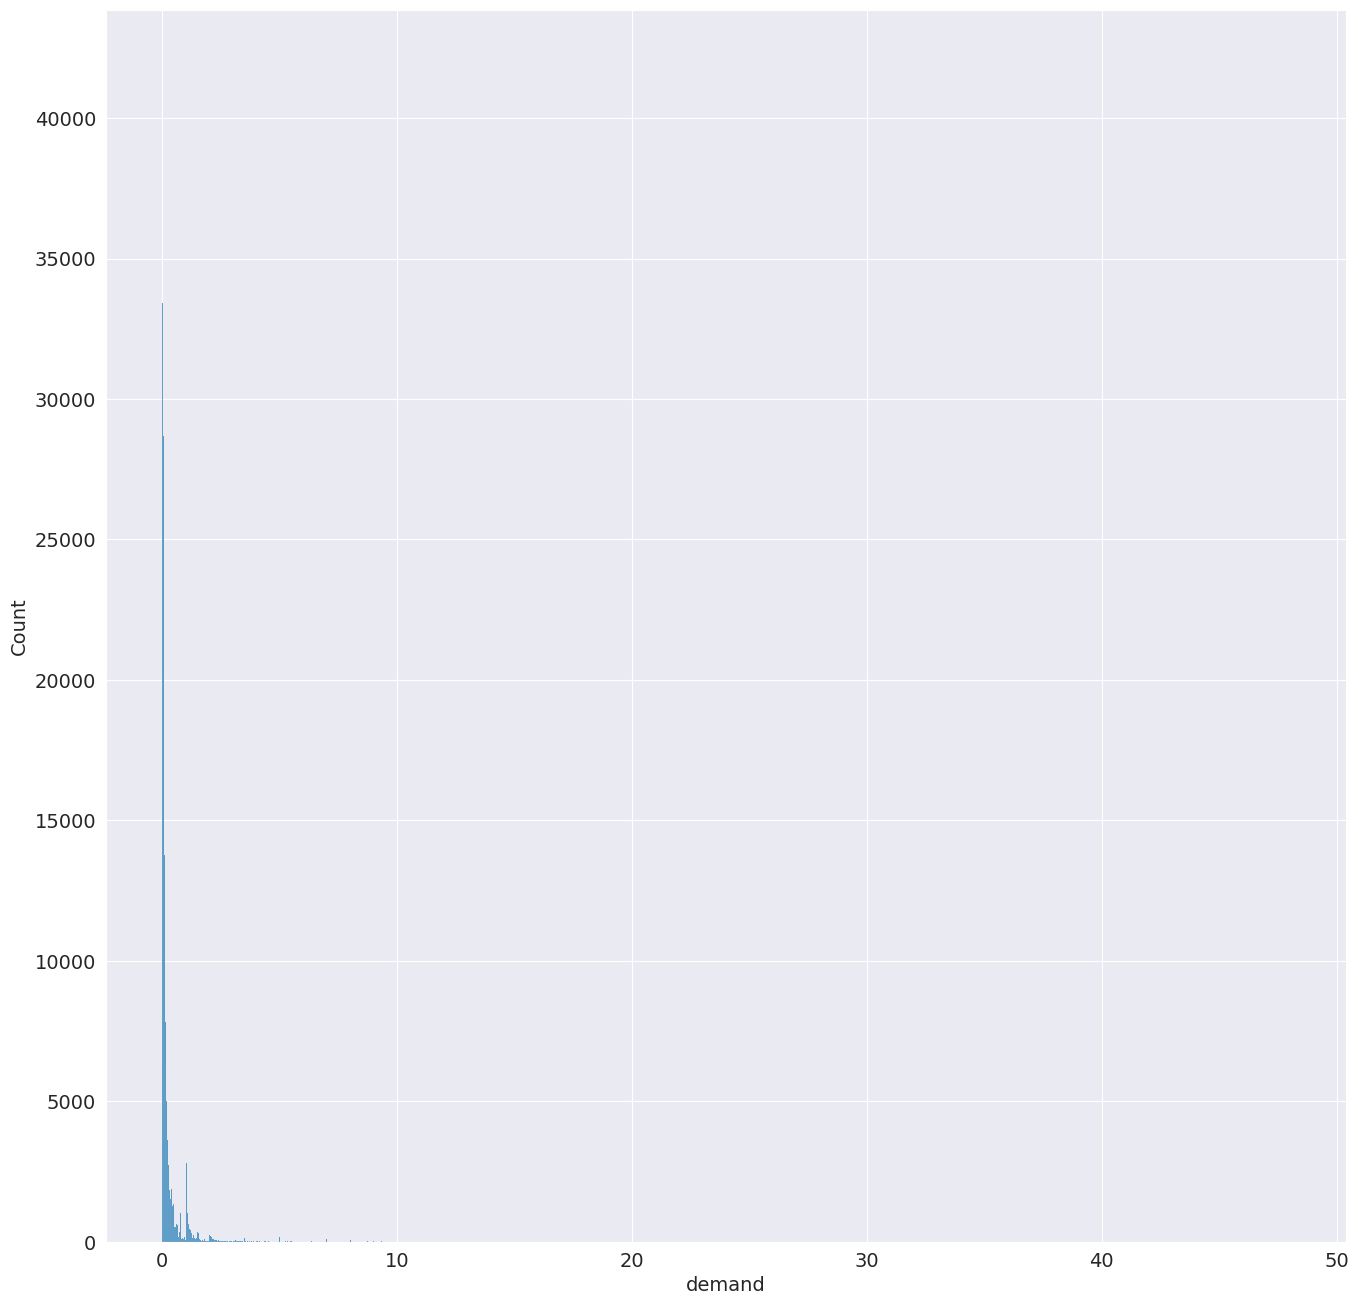

In [6]:
sns.histplot(train['demand'])

In [8]:
test_id = test['id'].tolist()

In [9]:
train = train[(train['demand'].notna()) | (train['id'].isin(test_id))]

In [10]:
describe_data(train)

,column_name,var_type,dtype,unique_values,zero_values,zero_values%,nan_values,nan_values%
0,period_dt,numeric,object,156,0,0.000000,0,0.000000
1,location_id,numeric,float64,41,0,0.000000,0,0.000000
2,product_id,numeric,float64,2140,0,0.000000,0,0.000000
3,demand,numeric,float64,16292,5238,1.904284,593,0.215586
4,PROMO1_FLAG,numeric,float64,5,161250,58.622721,1796,0.652939
5,PROMO2_FLAG,numeric,float64,3,272550,99.086031,1796,0.652939
6,PRICE_REGULAR,numeric,float64,2618,0,0.000000,6593,2.396897
7,PRICE_AFTER_DISC,numeric,float64,12738,0,0.000000,8150,2.962947
8,NUM_CONSULTANT,numeric,float64,12,251923,91.587049,1796,0.652939
9,AUTORIZATION_FLAG,numeric,float64,3,34987,12.719585,1796,0.652939


In [11]:
describe_data(train[train['id'].isin(test_id)])

,column_name,var_type,dtype,unique_values,zero_values,zero_values%,nan_values,nan_values%
0,period_dt,numeric,object,4,0,0.000000,0,0.000000
1,location_id,numeric,float64,35,0,0.000000,0,0.000000
2,product_id,numeric,float64,277,0,0.000000,0,0.000000
3,demand,numeric,float64,1,0,0.000000,593,100.000000
4,PROMO1_FLAG,numeric,float64,3,52,8.768971,5,0.843170
5,PROMO2_FLAG,numeric,float64,2,588,99.156830,5,0.843170
6,PRICE_REGULAR,numeric,float64,72,0,0.000000,10,1.686341
7,PRICE_AFTER_DISC,numeric,float64,139,0,0.000000,10,1.686341
8,NUM_CONSULTANT,numeric,float64,8,497,83.811130,5,0.843170
9,AUTORIZATION_FLAG,numeric,float64,3,2,0.337268,5,0.843170


In [12]:
train[train['id'].isin(test_id)].describe()

,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id
count,593.000000,593.000000,0.0,588.000000,588.0,583.000000,583.000000,588.000000,588.000000,593.000000
mean,983.153457,113727.856661,NaN,0.911565,0.0,3705.756432,1894.111900,0.780612,0.996599,181082.079258
std,347.833437,24440.102347,NaN,0.284169,0.0,1222.999550,686.029465,1.889944,0.058271,37138.210091
min,317.000000,22939.000000,NaN,0.000000,0.0,579.000000,289.000000,0.000000,0.000000,16.000000
25%,644.000000,101470.000000,NaN,1.000000,0.0,2750.000000,1375.000000,0.000000,1.000000,180299.000000
50%,1162.000000,119474.000000,NaN,1.000000,0.0,3799.000000,1899.500000,0.000000,1.000000,198275.000000
75%,1316.000000,130630.000000,NaN,1.000000,0.0,3949.000000,2049.500000,0.000000,1.000000,201318.000000
max,1380.000000,148683.000000,NaN,1.000000,0.0,13149.000000,6574.500000,11.000000,1.000000,204065.000000


array([[<AxesSubplot:title={'center':'location_id'}>,
        <AxesSubplot:title={'center':'product_id'}>,
        <AxesSubplot:title={'center':'demand'}>],
       [<AxesSubplot:title={'center':'PROMO1_FLAG'}>,
        <AxesSubplot:title={'center':'PROMO2_FLAG'}>,
        <AxesSubplot:title={'center':'PRICE_REGULAR'}>],
       [<AxesSubplot:title={'center':'PRICE_AFTER_DISC'}>,
        <AxesSubplot:title={'center':'NUM_CONSULTANT'}>,
        <AxesSubplot:title={'center':'AUTORIZATION_FLAG'}>],
       [<AxesSubplot:title={'center':'id'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

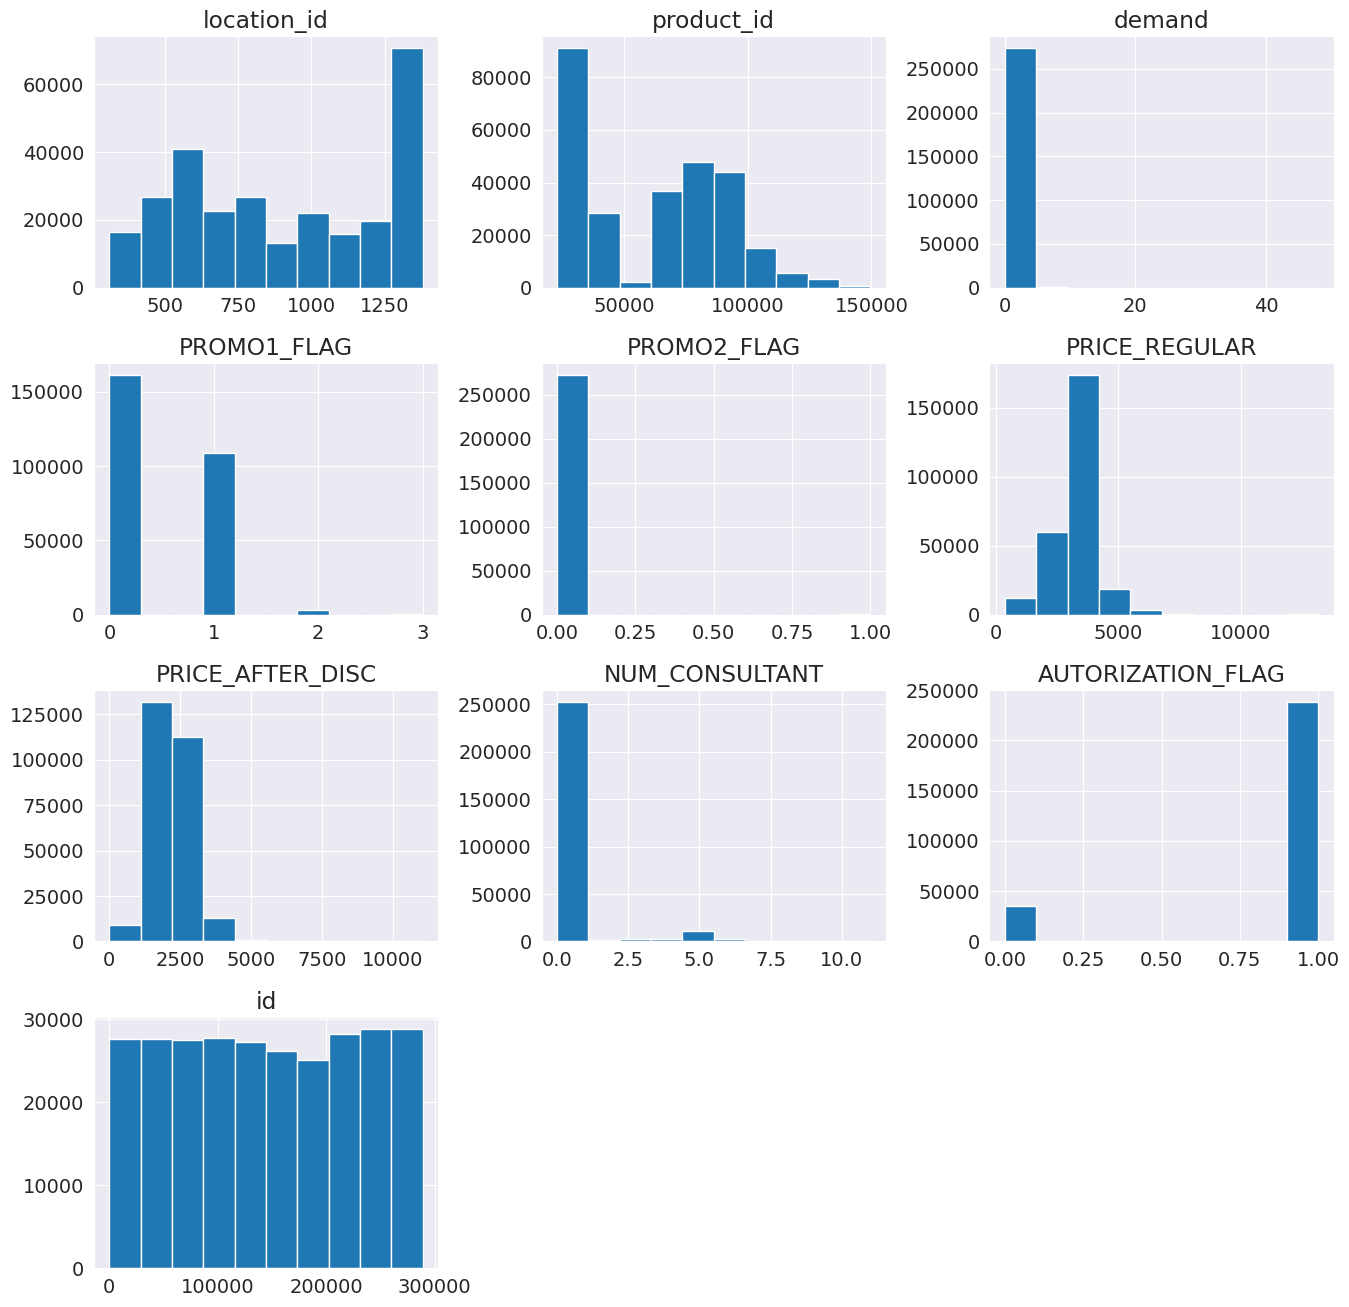

In [13]:
sns.mpl.rc("figure", figsize=(16, 16))

train.hist()

In [14]:
sns.set_style("darkgrid")
sns.mpl.rc("figure", figsize=(25, 5))
sns.mpl.rc("font", size=14)

In [15]:
train.isna().sum()

period_dt               0
location_id             0
product_id              0
demand                593
PROMO1_FLAG          1796
PROMO2_FLAG          1796
PRICE_REGULAR        6593
PRICE_AFTER_DISC     8150
NUM_CONSULTANT       1796
AUTORIZATION_FLAG    1796
id                      0
dtype: int64

In [16]:
# посмотрим на другие пропуски
train['PROMO1_FLAG'].fillna(0, inplace=True)
train['PROMO2_FLAG'].fillna(0, inplace=True)
train['NUM_CONSULTANT'].fillna(0, inplace=True)
train['AUTORIZATION_FLAG'].fillna(1, inplace=True)

In [17]:
train['PRICE_REGULAR'].fillna(train['PRICE_REGULAR'].mean(), inplace=True)
train['PRICE_AFTER_DISC'].fillna(train['PRICE_AFTER_DISC'].mean(), inplace=True)

In [18]:
train = train[(train['PROMO2_FLAG'] == 0)]
train.drop(columns=['PROMO2_FLAG'], inplace=True)
train

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id
10,2019-12-30,1162.0,22939.0,NaN,0.0,3649.0,2189.40,0.0,1.0,16
15,2019-12-02,637.0,22939.0,0.035398,1.0,3649.0,3101.65,0.0,1.0,25
16,2017-08-28,317.0,22939.0,1.000000,1.0,2380.0,2380.00,0.0,1.0,26
17,2018-03-05,355.0,22939.0,2.000000,0.0,3549.0,2306.85,0.0,1.0,27
18,2018-03-19,355.0,22939.0,1.013850,0.0,3549.0,2306.85,0.0,1.0,28
...,...,...,...,...,...,...,...,...,...,...
284114,2019-11-11,1316.0,149472.0,1.000000,1.0,4449.0,2224.50,0.0,1.0,288670
284115,2019-11-11,1316.0,149509.0,1.000000,1.0,3999.0,1999.50,0.0,1.0,288671
284116,2019-11-18,1316.0,149354.0,2.000000,1.0,9799.0,4899.50,0.0,1.0,288672
284117,2019-11-25,1316.0,25952.0,1.000000,1.0,4299.0,2149.50,0.0,1.0,288673


In [19]:
train.rename(columns={"PROMO1_FLAG": "PROMO"}, inplace=True)
train.loc[train['PROMO'] > 1, 'PROMO'] = 1

In [20]:
train['discount'] = train['PRICE_REGULAR'] - train['PRICE_AFTER_DISC']
train.loc[train['PROMO'] == 0, 'discount'] = 0

<AxesSubplot:xlabel='period_dt'>

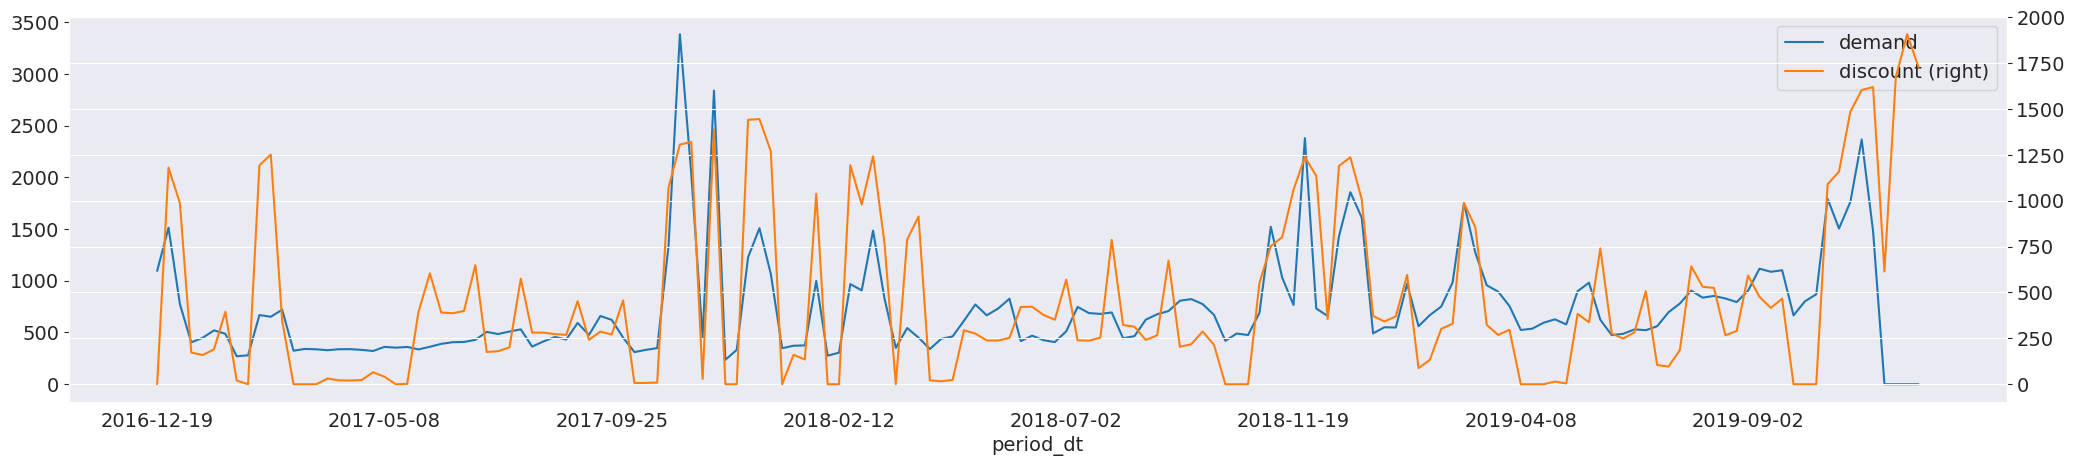

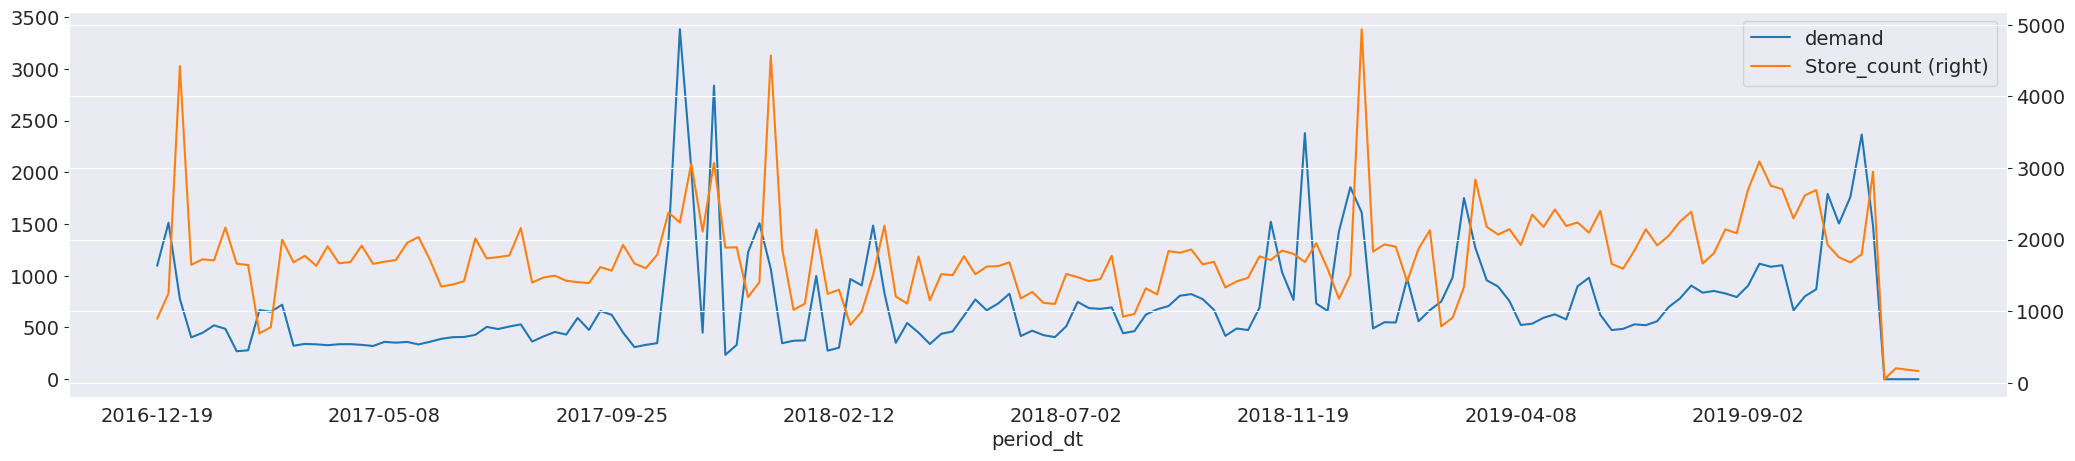

In [21]:
sales = train.groupby(['period_dt']).agg({'demand':'sum', 'location_id':'count', 'discount':'mean'}).reset_index().set_index('period_dt').rename(columns = {'location_id':'Store_count'})

sales[['demand', 'discount']].plot(secondary_y = ['discount'])
sales[['demand', 'Store_count']].plot(secondary_y = ['Store_count'])

In [22]:
train

,period_dt,location_id,product_id,demand,PROMO,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,discount
10,2019-12-30,1162.0,22939.0,NaN,0.0,3649.0,2189.40,0.0,1.0,16,0.00
15,2019-12-02,637.0,22939.0,0.035398,1.0,3649.0,3101.65,0.0,1.0,25,547.35
16,2017-08-28,317.0,22939.0,1.000000,1.0,2380.0,2380.00,0.0,1.0,26,0.00
17,2018-03-05,355.0,22939.0,2.000000,0.0,3549.0,2306.85,0.0,1.0,27,0.00
18,2018-03-19,355.0,22939.0,1.013850,0.0,3549.0,2306.85,0.0,1.0,28,0.00
...,...,...,...,...,...,...,...,...,...,...,...
284114,2019-11-11,1316.0,149472.0,1.000000,1.0,4449.0,2224.50,0.0,1.0,288670,2224.50
284115,2019-11-11,1316.0,149509.0,1.000000,1.0,3999.0,1999.50,0.0,1.0,288671,1999.50
284116,2019-11-18,1316.0,149354.0,2.000000,1.0,9799.0,4899.50,0.0,1.0,288672,4899.50
284117,2019-11-25,1316.0,25952.0,1.000000,1.0,4299.0,2149.50,0.0,1.0,288673,2149.50


In [23]:
#train.drop(columns=['AUTORIZATION_FLAG', 'PRICE_AFTER_DISC'], inplace=True)

In [24]:
prod = pd.read_csv('hse-dab-naf-23/PRODUCT.csv', delimiter=';')
prod.set_index("PRODUCT_RK", inplace = True)
prod

,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,PRODUCT_LVL_RK1,SALES_INTRODUCTION_DT,SALES_DISCONTINUED_DT,VALID_FROM_DTTM,VALID_TO_DTTM,...,PRODUCT_ATTRIB23_hashing,PRODUCT_ATTRIB24_hashing,PRODUCT_ATTRIB25_hashing,PRODUCT_ATTRIB26_hashing,PRODUCT_ATTRIB27_hashing,PRODUCT_ATTRIB28_hashing,PRODUCT_ATTRIB29_hashing,PRODUCT_ATTRIB30_hashing,PRODUCT_ATTRIB31_hashing,PRODUCT_TYPE_CD_hashing
PRODUCT_RK,,,,,,,,,,,,,,,,,,,,,
11316,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
11317,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
11318,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
11319,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
11320,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,190706,6196,113158,9965,9848,1,NaN,NaN,03Jan2020:07:01:13,01Jan5999:00:00:00,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,B748B7A8EE4559D5BA632F0F079BDAC7,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
191029,73057,113184,6204,9965,9848,1,NaN,NaN,03Jan2020:07:01:13,01Jan5999:00:00:00,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,57A8D677942BEC55FFB6C2F3ED8A8D3D,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
191030,73057,113184,6204,9965,9848,1,NaN,NaN,03Jan2020:07:01:13,01Jan5999:00:00:00,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,57A8D677942BEC55FFB6C2F3ED8A8D3D,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977


In [25]:
loc = pd.read_csv('hse-dab-naf-23/LOCATION.csv', delimiter=';')
loc.set_index("STORE_LOCATION_RK", inplace = True)
loc

,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,VALID_FROM_DTTM,VALID_TO_DTTM,PROCESSED_DTTM,STORE_LOCATION_ADK_hashing,...,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing,STORE_LOCATION_ATTRIB17_hashing,STORE_LOCATION_ATTRIB18_hashing,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing
STORE_LOCATION_RK,,,,,,,,,,,,,,,,,,,,,
277,124,124,19,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,181F921CC957DF5CEC4BF2C18E4A371F,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
278,124,124,19,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,181F921CC957DF5CEC4BF2C18E4A371F,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,0A7D98B3F3BA0A5BC89F693FB146FE40,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
279,183,183,20,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,181F921CC957DF5CEC4BF2C18E4A371F,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
280,211,211,12,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,181F921CC957DF5CEC4BF2C18E4A371F,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
281,221,221,3,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,181F921CC957DF5CEC4BF2C18E4A371F,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,227,227,2,1,NaN,NaN,30Nov2019:03:40:21,01Jan5999:00:00:00,03Jan2020:07:00:25,181F921CC957DF5CEC4BF2C18E4A371F,...,222236EE6D50563687CE7BBC6A1D6388,E393D33ACC3FB49899A4E1F1707ACC7C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1483,124,124,19,1,NaN,NaN,28Dec2019:10:40:25,01Jan5999:00:00:00,03Jan2020:07:00:25,181F921CC957DF5CEC4BF2C18E4A371F,...,222236EE6D50563687CE7BBC6A1D6388,E393D33ACC3FB49899A4E1F1707ACC7C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1484,24,24,11,1,NaN,NaN,28Dec2019:10:40:25,01Jan5999:00:00:00,03Jan2020:07:00:25,181F921CC957DF5CEC4BF2C18E4A371F,...,222236EE6D50563687CE7BBC6A1D6388,E393D33ACC3FB49899A4E1F1707ACC7C,B70EA5F8E1DD1E21F7485A

Выясняется, что больше одного значения (после чистки данных) имеют только колонки PRODUCT_LVL_RK6 и STORE_LOCATION_LVL_RK3-4. При этом STORE_LOCATION_LVL_RK3 и STORE_LOCATION_LVL_RK4 - одинаковые...

In [26]:
for i in [6]:
    col_name = f"PRODUCT_LVL_RK{i}"
    train[col_name] = train["product_id"].apply(lambda x: prod[col_name][x])
    
# Добавим колонку с главным показателем местоположения магазина и колонку для разбиения его на группы

for i in [3]:
    col_name = f"STORE_LOCATION_LVL_RK{i}"
    train[col_name] = train["location_id"].apply(lambda x: loc[col_name][x])

In [27]:
from typing import Optional, Iterable


def count_plot(title: str, data: pd.DataFrame, ax: plt.Axes = None, plot_type: str = 'line', scale: Iterable[float] = None,
               xlabel: Optional[str] = None, ylabel: Optional[str] = None, xticks: Optional[Iterable] = None):
    sns.set_style("darkgrid", {"grid.linestyle": ":", "grid.color": ".75"})
    if ax is None:
        fig, ax = plt.subplots(figsize=(9, 5))
    if scale is not None:
        ax.set(xlim=(scale[0], scale[1]))
    if plot_type == 'line':
        sns.lineplot(data, ax=ax)
    elif plot_type == 'bar':
        sns.barplot(data, x=data.columns[0], y=data.columns[1], ax=ax)
    if plot_type == 'hist':
        sns.histplot(data, bins=50, ax=ax)
    if xticks is not None:
        plt.xticks(xticks)
    ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)

In [34]:
train[train['id'].isin(test_id)]['NUM_CONSULTANT']

0.0    252617
5.0     11019
4.0      2989
6.0      2223
3.0      2042
2.0      1528
7.0       787
1.0       500
8.0        48
Name: NUM_CONSULTANT, dtype: int64

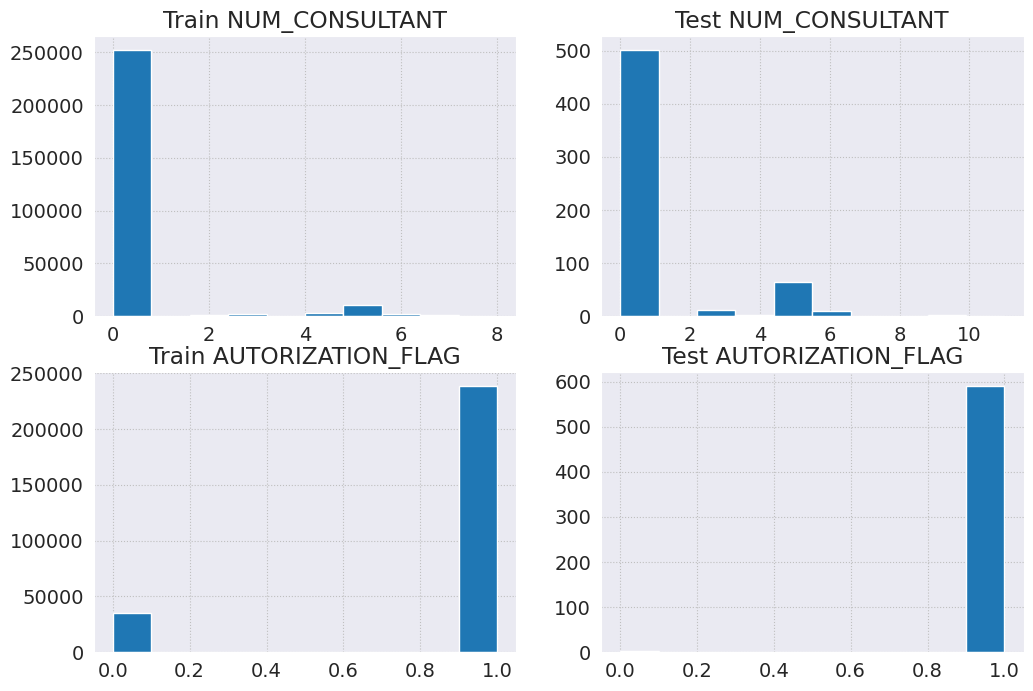

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0][0].hist(train[~train['id'].isin(test_id)]['NUM_CONSULTANT'])
ax[0][0].set_title('Train NUM_CONSULTANT')

ax[0][1].hist(train[train['id'].isin(test_id)]['NUM_CONSULTANT'])
ax[0][1].set_title('Test NUM_CONSULTANT')

ax[1][0].hist(train[~train['id'].isin(test_id)]['AUTORIZATION_FLAG'])
ax[1][0].set_title('Train AUTORIZATION_FLAG')

ax[1][1].hist(train[train['id'].isin(test_id)]['AUTORIZATION_FLAG'])
ax[1][1].set_title('Test AUTORIZATION_FLAG')
plt.show()

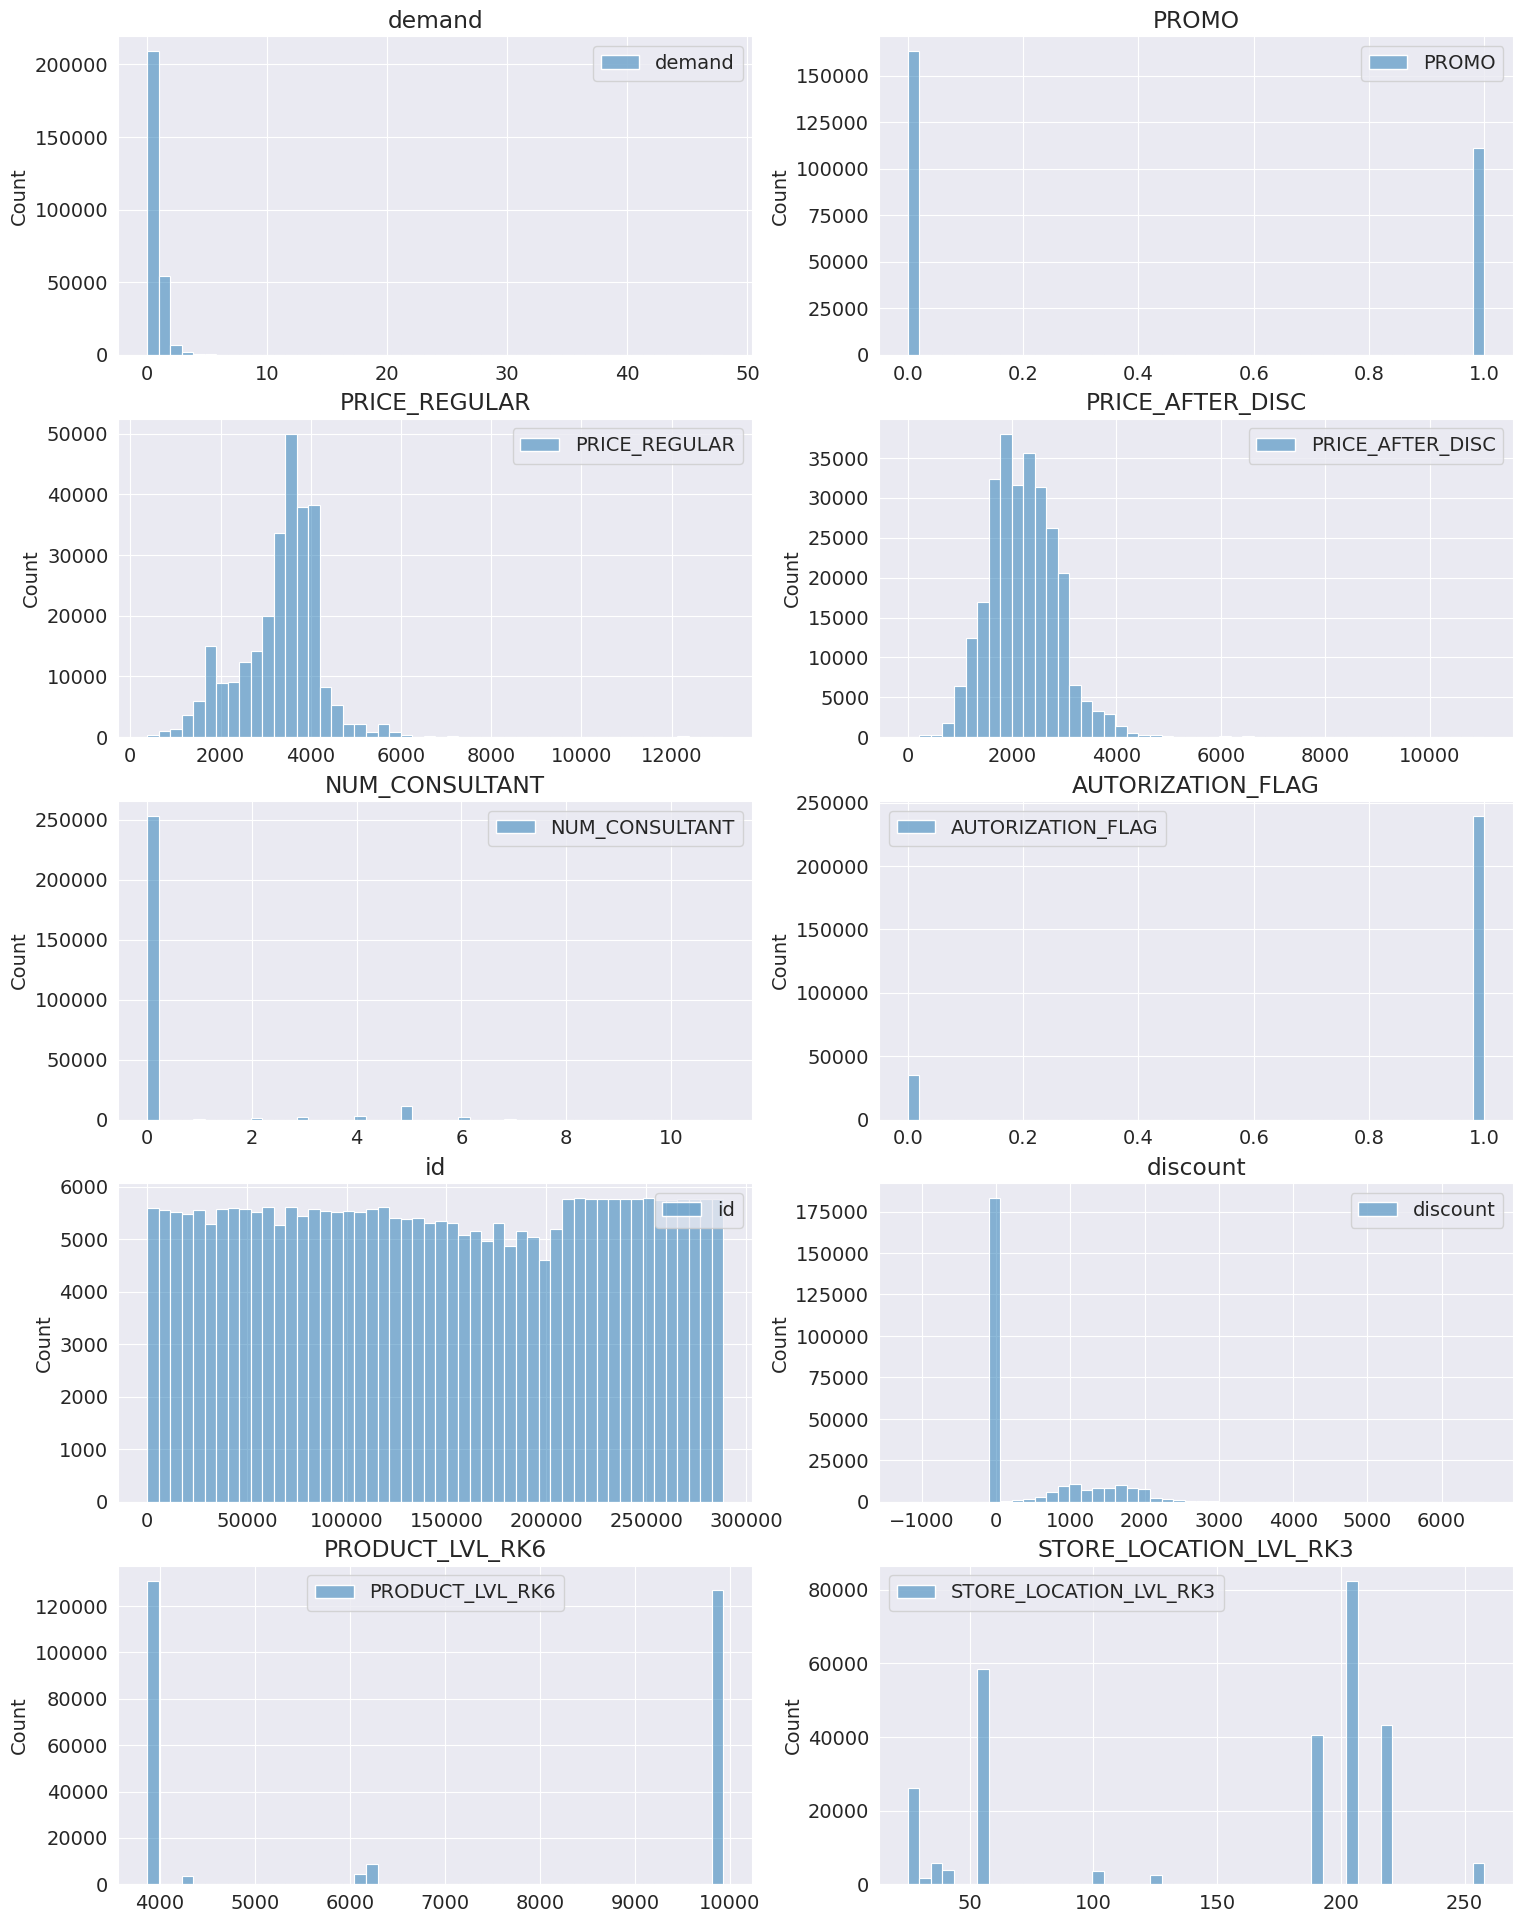

In [28]:
fig, ax = plt.subplots(5, 2, figsize=(18, 24))
for i, col in enumerate(train.columns, -3):
    if i < 0:
        continue
    count_plot(col, pd.DataFrame(train[col]), ax=ax[i // 2, i % 2], plot_type='hist')

In [30]:
numeric = list(train.columns)

In [32]:
describe_data(train[["PRODUCT_LVL_RK1", "PRODUCT_LVL_RK2", "PRODUCT_LVL_RK3", "PRODUCT_LVL_RK4", "PRODUCT_LVL_RK5", "PRODUCT_LVL_RK6", "STORE_LOCATION_LVL_RK1", "STORE_LOCATION_LVL_RK2", "STORE_LOCATION_LVL_RK3", "STORE_LOCATION_LVL_RK4"]])

,column_name,var_type,dtype,unique_values,zero_values,zero_values%,nan_values,nan_values%
0,PRODUCT_LVL_RK1,numeric,int64,1,0,0,0,0
1,PRODUCT_LVL_RK2,numeric,int64,1,0,0,0,0
2,PRODUCT_LVL_RK3,numeric,int64,1,0,0,0,0
3,PRODUCT_LVL_RK4,numeric,int64,1,0,0,0,0
4,PRODUCT_LVL_RK5,numeric,int64,1,0,0,0,0
5,PRODUCT_LVL_RK6,numeric,int64,36,0,0,0,0
6,STORE_LOCATION_LVL_RK1,numeric,int64,1,0,0,0,0
7,STORE_LOCATION_LVL_RK2,numeric,int64,1,0,0,0,0
8,STORE_LOCATION_LVL_RK3,numeric,int64,13,0,0,0,0
9,STORE_LOCATION_LVL_RK4,numeric,int64,13,0,0,0,0


Text(0.5, 1.0, 'Корреляция признаков')

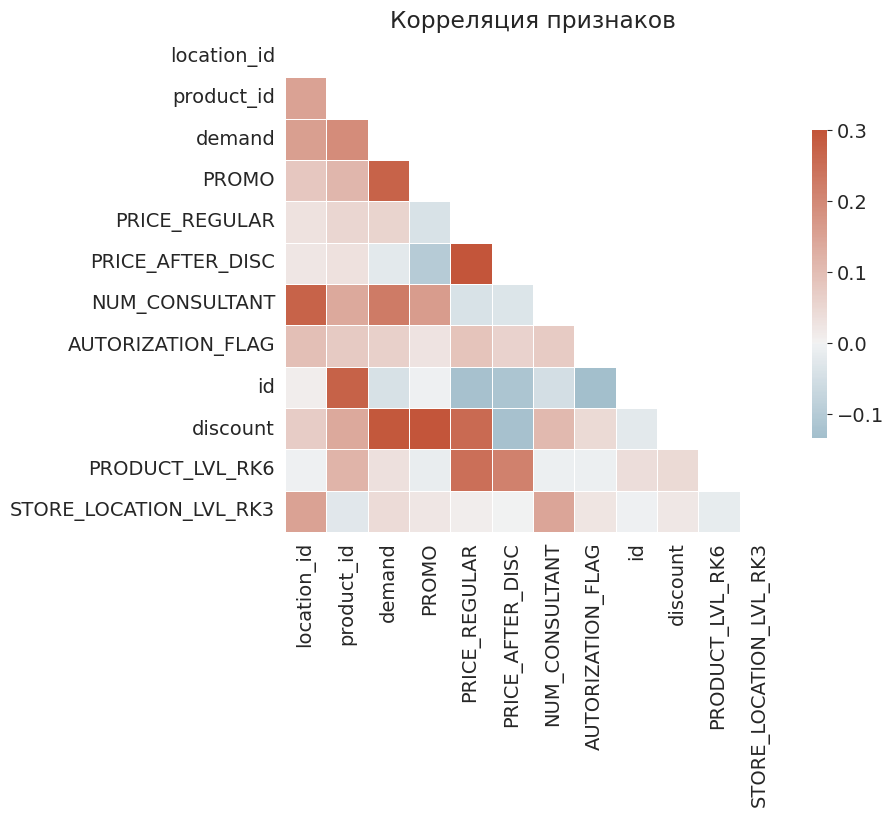

In [25]:
corr = train.corr()
sns.set_style("whitegrid", {"grid.linestyle": "", "grid.color": ".75"})
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, cmap=sns.diverging_palette(230, 20, as_cmap=True), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title('Корреляция признаков')

In [23]:
from itertools import product
from tqdm.notebook import tqdm
from ipywidgets import IntProgress

def percentile(n):
    '''Calculate n - percentile of data'''
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'pctl%s' % n
    return percentile_
    
# add missing dates to GroupBy.Core object
def fill_missing_dates(x, date_col):
    min_date, max_date = x[date_col].min(), x[date_col].max()
    groupby_day = x.groupby(pd.PeriodIndex(x[date_col], freq='D'))
    results = groupby_day.sum(min_count=1)

    idx = pd.period_range(min_date, max_date)
    results = results.reindex(idx, fill_value=np.nan)

    results.index.rename(date_col, inplace=True)

    return results


def calc_preag_fill(data, group_col, date_col, target_cols, preagg_method):
    ## calc preaggregation
    data_preag = data.groupby(group_col).agg(
        preagg_method)[target_cols].reset_index()

    ## fill missing dates
    data_preag_filled = data_preag.groupby(group_col[:-1]).apply(
        fill_missing_dates, date_col=date_col).drop(group_col[:-1],
                                                    axis=1).reset_index()

    ## return DataFrame with calculated preaggregation and filled missing dates
    return data_preag_filled


def calc_rolling(data_preag_filled, group_col, date_col, method, w):

    ## calc rolling stats
    lf_df_filled = data_preag_filled.groupby(group_col[:-1]).\
        apply(lambda x: x.set_index(date_col).rolling(window=w, min_periods=1).agg(method)).drop(group_col[:-1], axis=1)

    ## return DataFrame with rolled columns from target_vars
    return lf_df_filled


def calc_ewm(data_preag_filled, group_col, date_col, span):
    ## calc ewm stats
    lf_df_filled = data_preag_filled.groupby(group_col[:-1]).\
        apply(lambda x: x.set_index(date_col).ewm(span=span).mean()).drop(group_col[:-1], axis=1)

    ## return DataFrame with rolled columns from target_vars
    return lf_df_filled


def shift(lf_df_filled, group_col, date_col, lag):

    lf_df = lf_df_filled.groupby(
        level=group_col[:-1]).apply(lambda x: x.shift(lag)).reset_index()
    lf_df[date_col] = pd.to_datetime(lf_df[date_col].astype(str))

    ## return DataFrame with following columns: filter_col, id_cols, date_col and shifted stats
    return lf_df


def generate_lagged_features(
        data: pd.DataFrame,
        target_cols: list = ['Demand'],
        id_cols: list = ['SKU_id', 'Store_id'],
        date_col: str = 'Date',
        lags: list = [7, 14, 21, 28],
        windows: list = ['7D', '14D', '28D', '56D'],
        preagg_methods: list = ['mean'],
        agg_methods: list = ['mean', 'median', percentile(10), pd.Series.skew],
        dynamic_filters: list = ['weekday', 'Promo'],
        ewm_params: dict = {'weekday': [14, 28], 'Promo': [14, 42]}) -> pd.DataFrame:
    
    ''' 
    data - dataframe with default index
    target_cols - column names for lags calculation
    id_cols - key columns to identify unique values
    date_col - column with datetime format values
    lags - lag values(days)
    windows - windows(days/weeks/months/etc.),
        calculation is performed within time range length of window
    preagg_methods - applied methods before rolling to make
        every value unique for given id_cols
    agg_methods - method of aggregation('mean', 'median', percentile, etc.)
    dynamic_filters - column names to use as filter
    ewm_params - span values(days) for each dynamic_filter
    '''

    data = data.sort_values(date_col)
    out_df = deepcopy(data)
    dates = [min(data[date_col]), max(data[date_col])]

    total = len(target_cols) * len(lags) * len(windows) * len(preagg_methods) * len(agg_methods) * len(dynamic_filters)
    progress = IntProgress(min=0, max=total)
    display(progress)

    for filter_col in dynamic_filters:
        group_col = [filter_col] + id_cols + [date_col]
        for lag in lags:
            for preagg in preagg_methods:
                data_preag_filled = calc_preag_fill(data, group_col, date_col,
                                                    target_cols, preagg)

                ## add ewm features
                for alpha in ewm_params.get(filter_col, []):
                    ewm_filled = calc_ewm(data_preag_filled, group_col,
                                          date_col, alpha)
                    ewm = shift(ewm_filled, group_col, date_col, lag)
                    new_names = {x: "{0}_lag{1}d_alpha{2}_key{3}_preag{4}_{5}_dynamic_ewm".\
                        format(x, lag, alpha, '_'.join(id_cols), preagg, filter_col) for x in target_cols}

                    out_df = pd.merge(out_df,
                                      ewm.rename(columns=new_names),
                                      how='left',
                                      on=group_col)
                
                ## add rolling features
                for w in windows:
                    for method in agg_methods:
                        rolling_filled = calc_rolling(data_preag_filled,
                                                      group_col, date_col,
                                                      method, w)

                        ## lf_df - DataFrame with following columns: filter_col, id_cols, date_col, shifted rolling stats
                        rolling = shift(rolling_filled, group_col, date_col,
                                        lag)

                        method_name = method.__name__ if type(
                            method) != str else method

                        new_names = {x: "{0}_lag{1}d_w{2}_key{3}_preag{4}_ag{5}_{6}_dynamic_rolling".\
                                     format(x, lag, w, '_'.join(id_cols), preagg, method_name, filter_col) for x in target_cols}

                        out_df = pd.merge(out_df,
                                          rolling.rename(columns=new_names),
                                          how='left',
                                          on=group_col)
                        progress.value += 1

    return out_df

In [24]:
data = {}
ids = {}

test_weeks = ['2019-12-09', '2019-12-16', '2019-12-23', '2019-12-30']

for i in range(4):
    name = f'data_{i + 1}w'
    data[name + '_p'] = train[(~train['id'].isin(test_id)) | (train['period_dt'] == test_weeks[i])].drop(columns=['PRICE_AFTER_DISC']).sort_values('period_dt')
    ids[name + '_p'] = data[name + '_p']['id'].tolist()
    data[name + '_p'].drop(columns=['id'], inplace=True)

In [25]:
target_cols = ['demand']
id_cols = ['STORE_LOCATION_LVL_RK3', 'PRODUCT_LVL_RK6'] # чем больше тут брать ранг, тем точнее и дольше работает
date_col = 'period_dt'
built_in_funcs = [pd.Series.kurtosis, pd.Series.skew]

In [31]:
%%time
lags = [[8, 36, 85, 113, 246, 365, 731], [8, 36, 85, 113, 246, 365, 731],
        [15, 36, 85, 113, 246, 365, 731], [15, 36, 85, 113, 246, 365, 731],
        [22, 85, 113, 246, 365, 731], [22, 85, 113, 246, 365, 731],
        [29, 85, 113, 246, 365, 731], [29, 85, 113, 246, 365, 731]]
i = 0
for key in tqdm(data.keys()):
    data[key]['NoFilter'] = 1
    data[key] = generate_lagged_features(data[key],
                                         target_cols = target_cols,
                                         id_cols = id_cols,
                                         date_col = date_col, 
                                         lags = lags[i], 
                                         windows = ['14D', '28D', '35D', '70D', '140D', '280D', '364D'],
                                         preagg_methods = ['sum', 'count'], 
                                         agg_methods = ['mean', 'median'], 
                                         dynamic_filters = ['NoFilter', 'NUM_CONSULTANT'], 
                                         ewm_params={'NoFilter': [14, 70, 140], 'NUM_CONSULTANT': [14, 70, 140]}
                                        )
    i += 1

  0%|          | 0/8 [00:00<?, ?it/s]

IntProgress(value=0, max=392)

IntProgress(value=0, max=392)

IntProgress(value=0, max=392)

KeyboardInterrupt: 

In [26]:
for key in tqdm(data.keys()):
    data[key]['id'] = ids[key]
    data[key]['NoFilter'] = 1

  0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
from sklearn.model_selection import train_test_split
from hyperopt import hp, fmin, STATUS_OK, tpe, Trials
import lightgbm as lgb
from functools import partial
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [31]:
def objective(params, X_train, y_train, X_val, y_val):
    model = lgb.LGBMRegressor(**params, loss="mae")
    model.fit(X_train, y_train)
    return {'loss': mean_absolute_error(model.predict(X_val), y_val), 'params': params, 'status': STATUS_OK}

grad_boost_params = {
    "n_estimators" : hp.choice(label='n_estimators', options=range(10, 1000, 15)),
    "learning_rate" : hp.choice(label='learning_rate', options=np.logspace(-5, -1, 20)),
    "num_leaves" : hp.choice(label='num_leaves', options=range(15, 50, 3))
}

preds = []
answer_ids = []

for key in tqdm(data.keys()):
    d = data[key]
    X_train = d[~d['id'].isin(test_id)].drop(columns=['id', 'demand', 'NoFilter']).set_index('period_dt')
    y_train = d[~d['id'].isin(test_id)]['demand']
    
    answer_ids += d[d['id'].isin(test_id)]['id'].tolist()
    X_test = d[d['id'].isin(test_id)].drop(columns=['id', 'demand', 'NoFilter']).set_index('period_dt')
    y_test = np.array([1] * X_test.shape[0])
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
    
    cols = X_train.columns[6:]
#     column_transformer = ColumnTransformer([
#         #('imputer', SimpleImputer(), cols),
#         ('scaling', StandardScaler(), cols)
#     ])
#     X_train = column_transformer.fit_transform(X_train)
#     X_test = column_transformer.transform(X_test)
#     X_val = column_transformer.transform(X_val)
    
    trials = Trials()
    fmin(   
        fn=partial(objective, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val), 
        space=grad_boost_params,
        algo=tpe.suggest, 
        max_evals=20,
        trials=trials
    )

    model = lgb.LGBMRegressor(n_estimators=trials.best_trial['result']['params']['n_estimators'], 
                          learning_rate=trials.best_trial['result']['params']['learning_rate'],
                          num_leaves=trials.best_trial['result']['params']['num_leaves'], loss="mae")
    model.fit(X_train, y_train)
    
    preds += model.predict(X_test).tolist()

  0%|          | 0/4 [00:00<?, ?it/s]


100%|████████| 20/20 [01:00<00:00,  3.03s/trial, best loss: 0.31825406638517134]

100%|████████| 20/20 [01:08<00:00,  3.43s/trial, best loss: 0.32598825275384136]

100%|█████████| 20/20 [01:38<00:00,  4.92s/trial, best loss: 0.3228388631877153]

100%|████████| 20/20 [01:11<00:00,  3.60s/trial, best loss: 0.31400821893100167]


In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
from catboost import CatBoostRegressor

In [32]:
data['data_1w_p']

,period_dt,demand,PROMO,PRICE_REGULAR,NUM_CONSULTANT,discount,PRODUCT_LVL_RK6,STORE_LOCATION_LVL_RK3,id,NoFilter
253137,2016-12-19,0.777778,0.0,3329.673866,0.0,0.0,9912,54,257693,1
76228,2016-12-19,4.363636,0.0,3329.673866,0.0,0.0,9912,203,77331,1
249013,2016-12-19,1.000000,0.0,3329.673866,0.0,0.0,3876,258,253569,1
106722,2016-12-19,1.000000,0.0,3329.673866,0.0,0.0,3874,189,108127,1
261926,2016-12-19,1.038462,0.0,3329.673866,0.0,0.0,3897,28,266482,1
...,...,...,...,...,...,...,...,...,...,...
124927,2019-12-09,NaN,0.0,5999.000000,0.0,0.0,3876,28,126535,1
170593,2019-12-09,NaN,1.0,2478.000000,0.0,1239.0,3897,258,173534,1
181401,2019-12-09,NaN,0.0,3329.673866,0.0,0.0,3874,54,184919,1
99714,2019-12-09,NaN,1.0,2249.000000,0.0,1574.3,3897,203,101054,1


In [94]:
%%time

def objective(params, X_train, y_train, X_val, y_val):
    model = CatBoostRegressor(**params, verbose=False, loss_function='MAE')
    model.fit(X_train, y_train)
    
    return {'loss': mean_absolute_error(model.predict(X_val), y_val), 'params': params, 'status': STATUS_OK}

grad_boost_params = {
    "n_estimators" : hp.choice(label='n_estimators', options=range(10, 1000, 15)),
    "learning_rate" : hp.choice(label='learning_rate', options=np.logspace(-5, -1, 20)),
    "l2_leaf_reg" : hp.choice(label='l2_leaf_reg', options=[1, 2, 4, 8, 16, 32, 64])
}

preds = []
answer_ids = []

for key in tqdm(data.keys()):
    d = data[key]
    X_train = d[~d['id'].isin(test_id)].drop(columns=['id', 'demand', 'NoFilter']).set_index('period_dt')
    y_train = d[~d['id'].isin(test_id)]['demand']
    
    answer_ids += d[d['id'].isin(test_id)]['id'].tolist()
    X_test = d[d['id'].isin(test_id)].drop(columns=['id', 'demand', 'NoFilter']).set_index('period_dt')
    y_test = np.array([1] * X_test.shape[0])
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
    
    cols = X_train.columns[6:]
#     column_transformer = ColumnTransformer([
#         #('imputer', SimpleImputer(), cols),
#         ('scaling', StandardScaler(), cols)
#     ])
#     X_train = column_transformer.fit_transform(X_train)
#     X_test = column_transformer.transform(X_test)
#     X_val = column_transformer.transform(X_val)
    
#     trials = Trials()
#     fmin(   
#         fn=partial(objective, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val), 
#         space=grad_boost_params,
#         algo=tpe.suggest, 
#         max_evals=20,
#         trials=trials
#     )
#     model = CatBoostRegressor(n_estimators=trials.best_trial['result']['params']['n_estimators'], 
#                           learning_rate=trials.best_trial['result']['params']['learning_rate'],
#                           l2_leaf_reg=trials.best_trial['result']['params']['l2_leaf_reg'],
#                           loss_function='MAE', verbose=False)
    model = CatBoostRegressor(verbose=False, loss_function='MAE')
    model.fit(X_train, y_train, eval_set=(X_val, y_val))
    
    preds += model.predict(X_test).tolist()

  0%|          | 0/4 [00:00<?, ?it/s]

CPU times: user 3min 24s, sys: 15.7 s, total: 3min 39s
Wall time: 39.8 s


In [79]:
preds[indexes] = 

In [107]:
preds2 = np.array(preds.copy())

<AxesSubplot:xlabel='demand', ylabel='Count'>

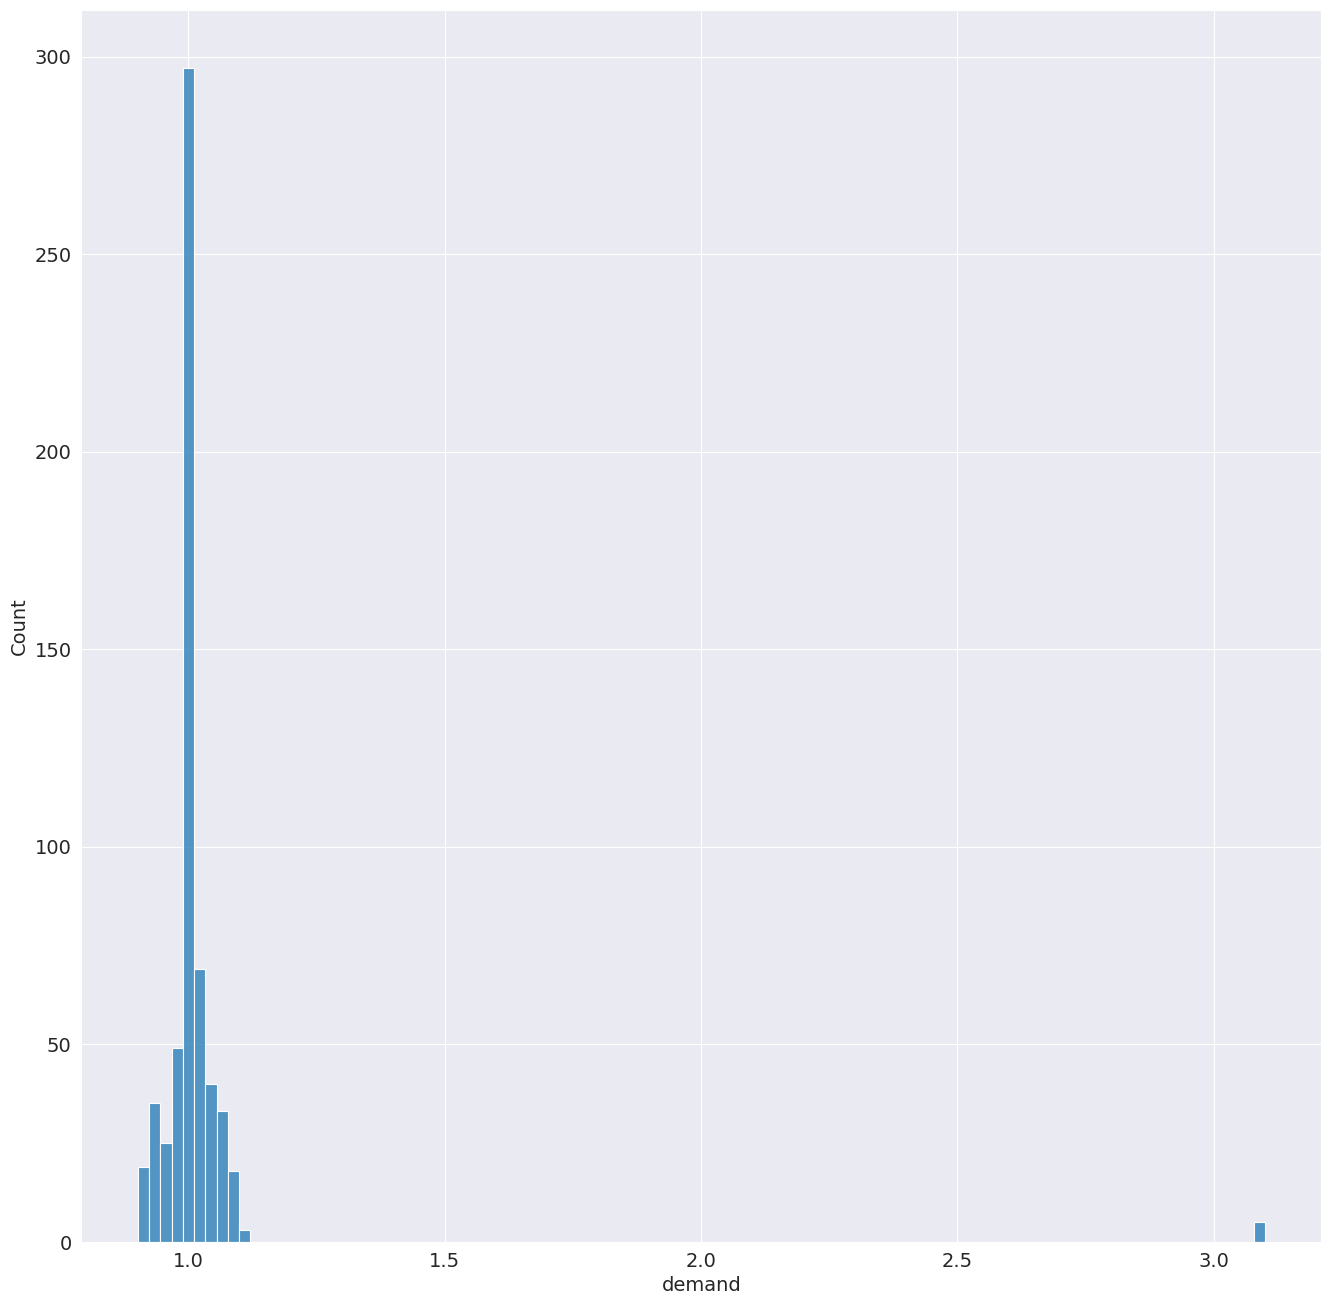

In [108]:
answer = pd.DataFrame()

answer['id'] = answer_ids
answer['demand'] = np.array(preds2)
answer.sort_values('id', inplace=True)
answer.set_index('id', inplace=True)
answer.to_csv('project_answer.csv')
sns.histplot(answer['demand'], bins=100)